Minimum x found by Golden Section Search: 2.184352
Minimum function value: -0.963291
Number of iterations: 27


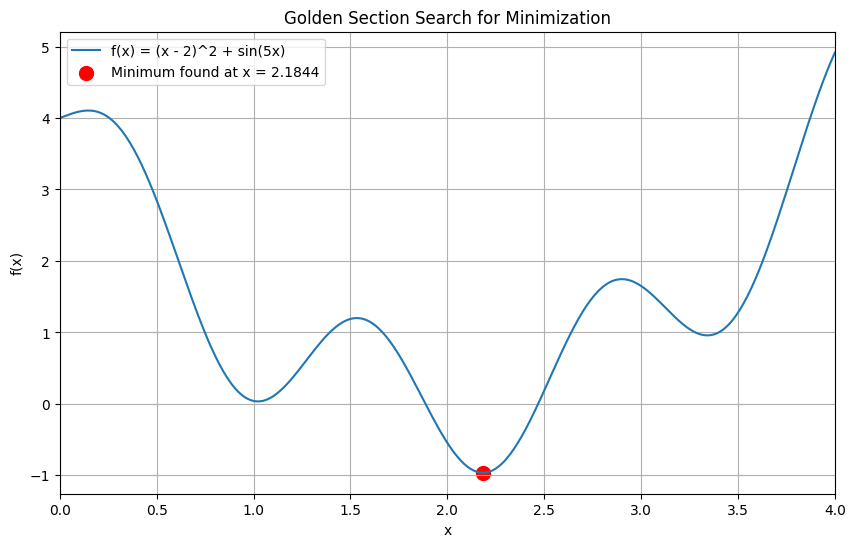

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  """
  The function to minimize: f(x) = (x - 2)^2 + sin(5x)
  """
  return (x - 2)**2 + np.sin(5*x)

def golden_section_search(func, a, b, tolerance):
  """
  Golden Section Search algorithm to find the minimum of a unimodal function
  within a given interval.

  Args:
    func: The function to minimize.
    a: The lower bound of the interval.
    b: The upper bound of the interval.
    tolerance: The desired tolerance for the interval width.

  Returns:
    x_min: The approximate x-value that minimizes the function.
    f_min: The minimum function value.
    iterations: Number of iterations taken.
  """
  phi = (1 + np.sqrt(5)) / 2  # Golden ratio
  x1 = b - (b - a) / phi
  x2 = a + (b - a) / phi

  f_x1 = func(x1)
  f_x2 = func(x2)

  iterations = 0
  while (b - a) > tolerance:
    iterations += 1
    if f_x1 < f_x2:
      b = x2
      x2 = x1
      f_x2 = f_x1
      x1 = b - (b - a) / phi
      f_x1 = func(x1)
    else:
      a = x1
      x1 = x2
      f_x1 = f_x2
      x2 = a + (b - a) / phi
      f_x2 = func(x2)

  x_min = (a + b) / 2
  f_min = func(x_min)
  return x_min, f_min, iterations

# Define the interval and tolerance
a = 0
b = 4
tolerance = 1e-5

# Perform Golden Section Search
x_min_golden, f_min_golden, iterations_golden = golden_section_search(f, a, b, tolerance)

print(f"Minimum x found by Golden Section Search: {x_min_golden:.6f}")
print(f"Minimum function value: {f_min_golden:.6f}")
print(f"Number of iterations: {iterations_golden}")

# Plotting the function and the minimum
x_vals = np.linspace(0, 4, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) = (x - 2)^2 + sin(5x)')
plt.scatter(x_min_golden, f_min_golden, color='red', marker='o', s=100, label=f'Minimum found at x = {x_min_golden:.4f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Golden Section Search for Minimization')
plt.xlim(0, 4)
plt.grid(True)
plt.legend()
plt.show()

Running Gradient Descent with alpha = 0.01...
Finished. Final x ≈ 2.2419
Running Gradient Descent with alpha = 0.1...
Finished. Final x ≈ 2.1454
Running Gradient Descent with alpha = 0.3...
Diverged/Overflow


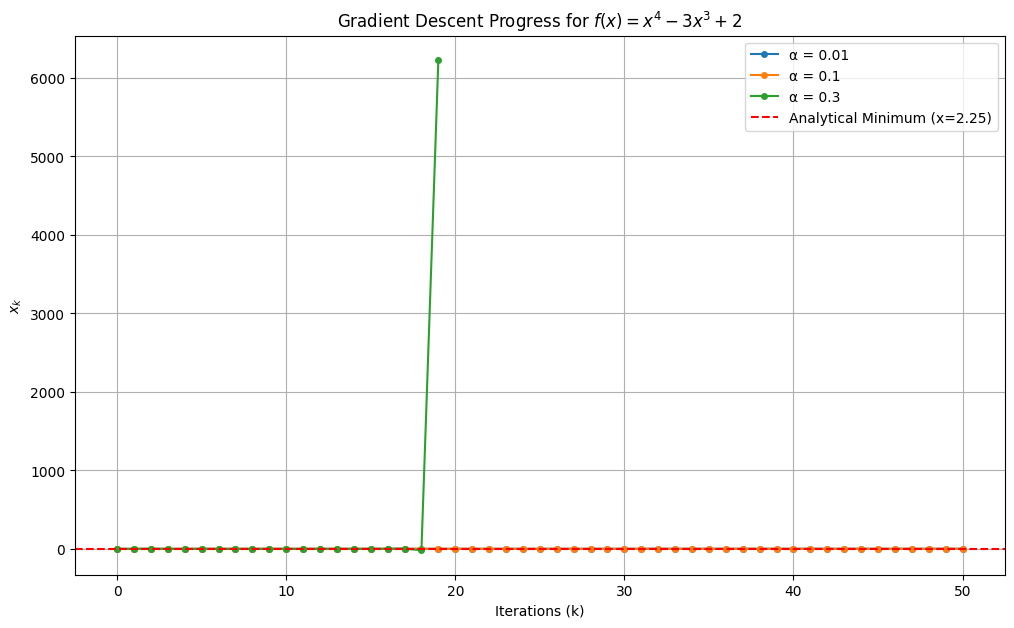


--- Convergence Analysis ---

Learning Rate (α) = 0.01:
  - Final x value after 50 iterations: 2.241910
  - Gradient at final x, f'(x): -0.162647
  - Convergence: Did not fully converge (gradient not close to zero). May need more iterations or different alpha.
  - Speed: Slow convergence.

Learning Rate (α) = 0.1:
  - Final x value after 50 iterations: 2.145426
  - Gradient at final x, f'(x): -1.925360
  - Convergence: Did not fully converge (gradient not close to zero). May need more iterations or different alpha.
  - Speed: Faster convergence than α=0.01.

Learning Rate (α) = 0.3:
  - Result: Diverged or produced very large values/overflow.

Analytical minimum found at x = 2.25, f(x)=-6.54296875
------------------------------


In [5]:
import matplotlib.pyplot as plt
import numpy as np # Using numpy for potential large numbers or future extensions

# Define the function and its derivative
def f(x):
  """The function to minimize."""
  return x**4 - 3*x**3 + 2

def df(x):
  """The derivative of the function f(x)."""
  return 4*x**3 - 9*x**2

# Gradient Descent Implementation
def gradient_descent(x0, alpha, n_iterations):
  """
  Performs gradient descent to minimize f(x).

  Args:
    x0: The starting point.
    alpha: The learning rate.
    n_iterations: The number of iterations to perform.

  Returns:
    A list containing the value of x at each iteration (including x0).
  """
  x_history = [x0]
  x = x0
  for _ in range(n_iterations):
    gradient = df(x)
    # Handle potential overflow/very large numbers before update
    if np.isinf(gradient) or np.isnan(gradient) or abs(alpha * gradient) > 1e10:
        print(f"Warning: Large step detected at iteration {_ + 1} for alpha={alpha}. Stopping early.")
        # Append NaN or the last valid x to indicate divergence/problem
        x_history.extend([np.nan] * (n_iterations - len(x_history) + 1)) # Fill rest with NaN
        break
    x = x - alpha * gradient
    x_history.append(x)
    # Optional: Add a check for convergence based on gradient size
    # if abs(gradient) < 1e-6:
    #    print(f"Converged early at iteration {_ + 1} for alpha={alpha}")
    #    break
  return x_history

# Parameters
x0 = 0.5
learning_rates = [0.01, 0.1, 0.3]
n_iterations = 50 # Number of steps to take

# Run gradient descent for each learning rate
results = {}
for alpha in learning_rates:
  print(f"Running Gradient Descent with alpha = {alpha}...")
  results[alpha] = gradient_descent(x0, alpha, n_iterations)
  print(f"Finished. Final x ≈ {results[alpha][-1]:.4f}" if not np.isnan(results[alpha][-1]) else "Diverged/Overflow")

# Plotting x_k vs iterations
plt.figure(figsize=(12, 7))
iterations = range(n_iterations + 1) # Need n+1 points for n iterations + start

for alpha, x_history in results.items():
  # Only plot valid numerical data, handle potential NaNs from divergence
  valid_iterations = [i for i, x in enumerate(x_history) if not np.isnan(x)]
  valid_x_history = [x for x in x_history if not np.isnan(x)]
  plt.plot(valid_iterations, valid_x_history, marker='o', linestyle='-', markersize=4, label=f'α = {alpha}')

# Find analytical minimum to plot as reference
# f'(x) = 4x^3 - 9x^2 = x^2(4x - 9) = 0 => x = 0 or x = 9/4 = 2.25
# f''(x) = 12x^2 - 18x
# f''(0) = 0 (inflection point)
# f''(2.25) = 12*(2.25)^2 - 18*(2.25) = 20.25 > 0 (local minimum)
analytical_min_x = 2.25
plt.axhline(analytical_min_x, color='red', linestyle='--', label=f'Analytical Minimum (x={analytical_min_x})')

plt.title('Gradient Descent Progress for $f(x) = x^4 - 3x^3 + 2$')
plt.xlabel('Iterations (k)')
plt.ylabel('$x_k$')
plt.legend()
plt.grid(True)
# Adjust ylim based on observed values, especially if divergence occurs
# plt.ylim(-1, 5) # Example: might need adjustment
plt.show()

# Analysis of Convergence
print("\n--- Convergence Analysis ---")
for alpha, x_history in results.items():
  final_x = x_history[-1]
  print(f"\nLearning Rate (α) = {alpha}:")
  if np.isnan(final_x) or np.isinf(final_x) or abs(final_x) > 1e6 : # Check for divergence indicators
      print("  - Result: Diverged or produced very large values/overflow.")
  else:
      print(f"  - Final x value after {len(x_history)-1} iterations: {final_x:.6f}")
      final_gradient = df(final_x)
      print(f"  - Gradient at final x, f'(x): {final_gradient:.6f}")
      if abs(final_gradient) < 1e-4: # Check if gradient is close to zero
          print("  - Convergence: Likely converged to a point where the gradient is near zero.")
          if abs(final_x - analytical_min_x) < 0.01:
               print(f"  - This point is close to the analytical minimum of x = {analytical_min_x}.")
          else:
               # Could potentially converge to x=0 (where gradient is also 0)
               print(f"  - This point (x={final_x:.4f}) has a zero gradient but might be an inflection point (like x=0) or a different local minimum if one existed.")
      else:
          print("  - Convergence: Did not fully converge (gradient not close to zero). May need more iterations or different alpha.")

      # Compare speed qualitatively
      if alpha == 0.01:
          print("  - Speed: Slow convergence.")
      elif alpha == 0.1:
          print("  - Speed: Faster convergence than α=0.01.")

print(f"\nAnalytical minimum found at x = {analytical_min_x}, f(x)={f(analytical_min_x)}")
print("-" * 30)

<ipython-input-10-b190ae45f1ec>:6: RuntimeWarning: invalid value encountered in log
  return np.log(x) + x**2


Iterations needed: 100

Iteration details:
Iteration 0: x = 2.0000000000, f(x) = 4.6931471806
Iteration 1: x = -0.5714285714, f(x) = nan
Iteration 2: x = -3.2941176471, f(x) = nan
Iteration 3: x = 0.3182349992, f(x) = -1.0436916633
Iteration 4: x = 0.7981285691, f(x) = 0.4115236324
Iteration 5: x = -5.8253642441, f(x) = nan
Iteration 6: x = 0.1742302121, f(x) = -1.7170216293
Iteration 7: x = 0.3709837111, f(x) = -0.8539682089
Iteration 8: x = 1.0237674176, f(x) = 1.0715890950
Iteration 9: x = -1.8678488059, f(x) = nan
Iteration 10: x = 0.6249370428, f(x) = -0.0795580583
Iteration 11: x = 5.7096021936, f(x) = 34.3417065623
Iteration 12: x = -0.1778716808, f(x) = nan
Iteration 13: x = -0.3797742087, f(x) = nan
Iteration 14: x = -1.0674664917, f(x) = nan
Iteration 15: x = 1.6692603801, f(x) = 3.2988108587
Iteration 16: x = -0.7300727431, f(x) = nan
Iteration 17: x = 22.1192538708, f(x) = 492.3578402464
Iteration 18: x = -0.0452557306, f(x) = nan
Iteration 19: x = -0.0908837357, f(x) = nan

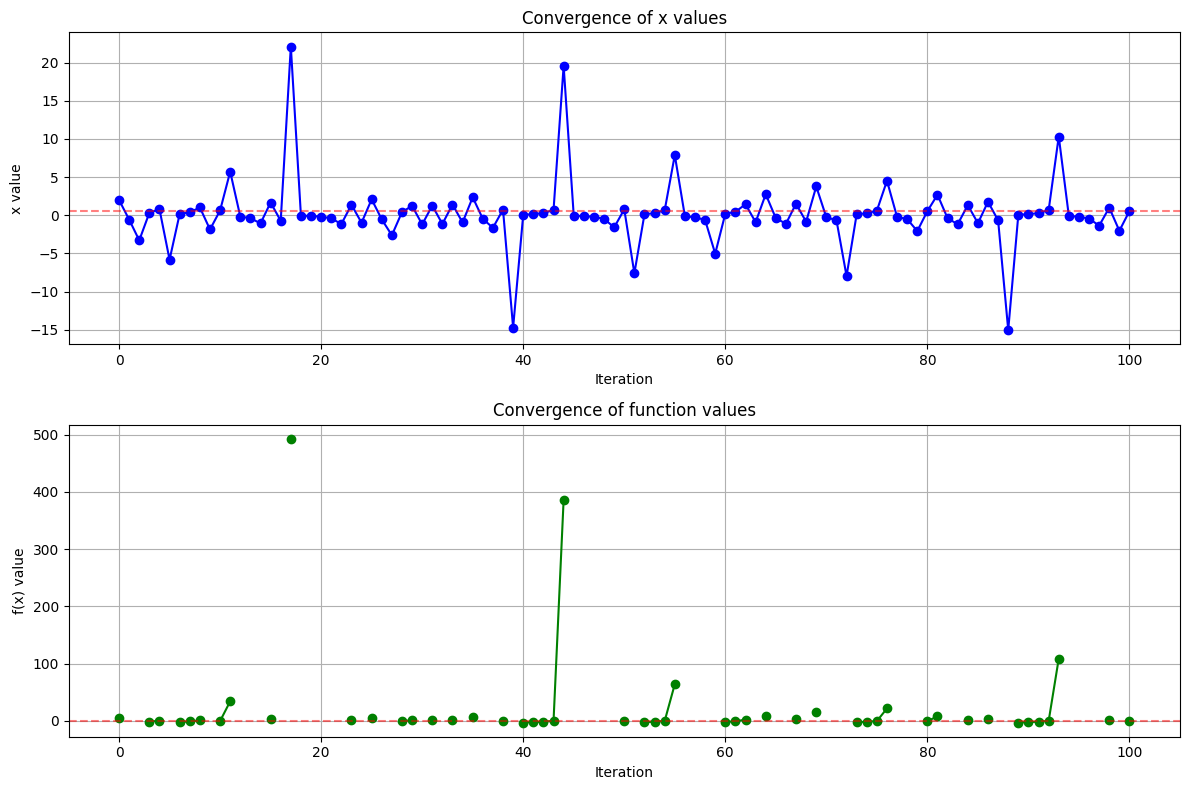

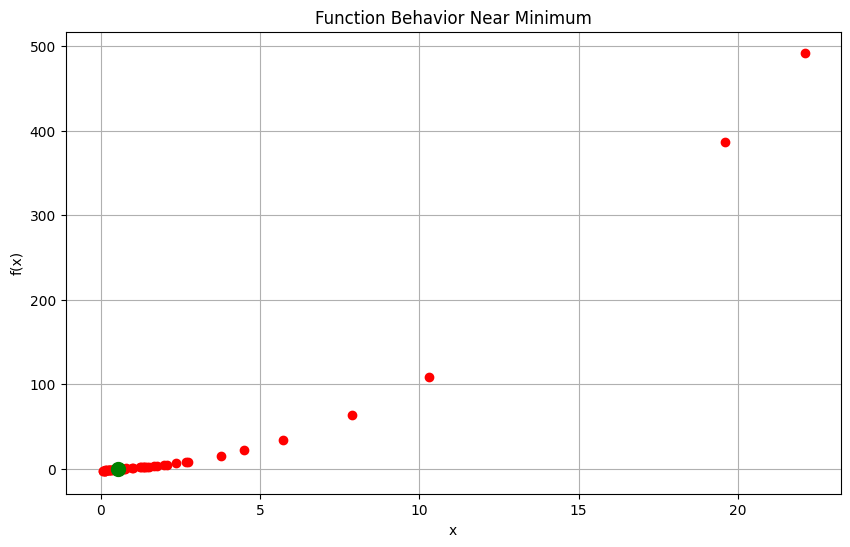


Convergence rate analysis:
Rate between iterations 1 and 2: 11.1525
Rate between iterations 2 and 3: -1.0619
Rate between iterations 3 and 4: 0.9936
Rate between iterations 4 and 5: -1.3028


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivatives
def f(x):
    return np.log(x) + x**2

def f_prime(x):
    return 1/x + 2*x

def f_double_prime(x):
    return -1/(x**2) + 2

# Newton's method implementation
def newton_method(x0, tol=1e-10, max_iter=100):
    x_values = [x0]
    f_values = [f(x0)]

    for i in range(max_iter):
        fp = f_prime(x_values[-1])
        fpp = f_double_prime(x_values[-1])

        # Newton update step
        x_new = x_values[-1] - fp / fpp

        # Store values
        x_values.append(x_new)
        f_values.append(f(x_new))

        # Check convergence
        if abs(x_values[-1] - x_values[-2]) < tol:
            break

    return x_values, f_values

# Run Newton's method with x0 = 2
x_values, f_values = newton_method(2)

# Print iterations
print(f"Iterations needed: {len(x_values) - 1}")
print("\nIteration details:")
for i, (x, fx) in enumerate(zip(x_values, f_values)):
    print(f"Iteration {i}: x = {x:.10f}, f(x) = {fx:.10f}")

# Find minimum value
x_min = x_values[-1]
f_min = f_values[-1]
print(f"\nMinimum found at x = {x_min:.10f} with value f(x) = {f_min:.10f}")

# Create plots
plt.figure(figsize=(12, 8))

# Plot 1: Convergence of x values
plt.subplot(2, 1, 1)
plt.plot(range(len(x_values)), x_values, 'bo-')
plt.axhline(y=x_min, color='r', linestyle='--', alpha=0.5)
plt.title('Convergence of x values')
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.grid(True)

# Plot 2: Convergence of function values
plt.subplot(2, 1, 2)
plt.plot(range(len(f_values)), f_values, 'go-')
plt.axhline(y=f_min, color='r', linestyle='--', alpha=0.5)
plt.title('Convergence of function values')
plt.xlabel('Iteration')
plt.ylabel('f(x) value')
plt.grid(True)

plt.tight_layout()
plt.savefig('newton_convergence.png')
plt.show()

# Plot the function near the minimum
x_range = np.linspace(max(0.01, x_min-1), x_min+1, 1000)
y_range = [f(x) for x in x_range]

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range)
plt.scatter(x_values, f_values, color='red', zorder=5)
plt.scatter(x_min, f_min, color='green', s=100, zorder=5)
plt.title('Function Behavior Near Minimum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.savefig('function_near_minimum.png')
plt.show()

# Calculate and print convergence rate
if len(x_values) > 3:
    print("\nConvergence rate analysis:")
    for i in range(2, min(6, len(x_values)-1)):
        e1 = abs(x_values[i-1] - x_min)
        e2 = abs(x_values[i] - x_min)
        if e1 > 0:
            rate = np.log(e2) / np.log(e1)
            print(f"Rate between iterations {i-1} and {i}: {rate:.4f}")